<a href="https://www.kaggle.com/chandanarprasad/100-celebs-x-22-years-of-forbes?scriptVersionId=85324954" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# import pandas_profiling as pp

In [2]:
df = pd.read_csv('../input/forbes-celebrity-100-19992020/forbescelebrities.csv')

In [3]:
# Profile_report = pp.ProfileReport(df,title='Forbes data')

In [4]:
# Profile_report.to_notebook_iframe()

In [5]:
df.head()

,Name,Year,Rank,Occupation
0,Kylie Jenner,2020,1,TV Personality
1,Kanye West,2020,2,Rapper/Producer
2,Roger Federer,2020,3,Tennis Player
3,Cristiano Ronaldo,2020,4,Soccer Player
4,Lionel Messi,2020,5,Soccer Player


In [6]:
df.shape

(2200, 4)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        2200 non-null   object
 1   Year        2200 non-null   int64 
 2   Rank        2200 non-null   int64 
 3   Occupation  2200 non-null   object
dtypes: int64(2), object(2)
memory usage: 68.9+ KB


In [8]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Name,2200,622,Howard Stern,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,2200.0,NaN,NaN,NaN,2009.5,6.345731,1999.0,2004.0,2009.5,2015.0,2020.0
Rank,2200.0,NaN,NaN,NaN,50.390909,28.829459,1.0,25.75,50.0,75.0,100.0
Occupation,2200,92,Actor,248,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
df.Name = df.Name.astype('str')
df.Name.dtype

dtype('O')

In [10]:
df.Name.value_counts(ascending=False)

Howard Stern       22
Tiger Woods        22
Rush Limbaugh      21
Oprah Winfrey      17
LeBron James       17
                   ..
The Police          1
Ana Ivanovic        1
Anne Hathaway       1
Barack Obama        1
George Bush Sr.     1
Name: Name, Length: 622, dtype: int64

In [11]:
df.Year.value_counts()

2020    100
2019    100
2000    100
2001    100
2002    100
2003    100
2004    100
2005    100
2006    100
2007    100
2008    100
2009    100
2010    100
2011    100
2012    100
2013    100
2014    100
2015    100
2016    100
2017    100
2018    100
1999    100
Name: Year, dtype: int64

In [12]:
df.Rank.value_counts(bins=10)

(20.8, 30.7]     223
(80.2, 90.1]     223
(70.3, 80.2]     221
(0.9, 10.9]      220
(10.9, 20.8]     220
(30.7, 40.6]     220
(40.6, 50.5]     220
(50.5, 60.4]     220
(60.4, 70.3]     218
(90.1, 100.0]    215
Name: Rank, dtype: int64

<AxesSubplot:>

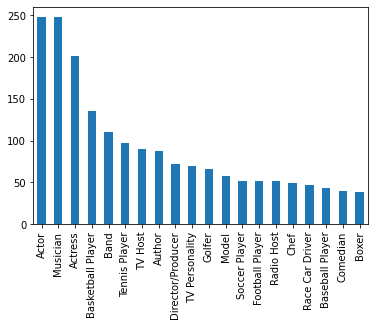

In [13]:
df.Occupation.value_counts().head(20).plot(kind='bar')

<AxesSubplot:>

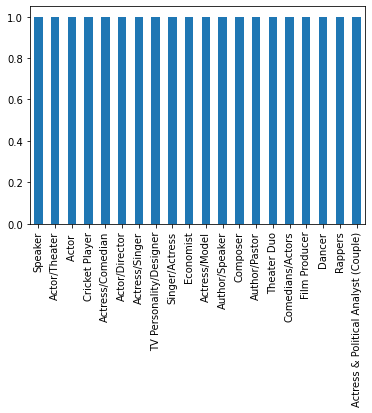

In [14]:
df.Occupation.value_counts().tail(20).plot(kind='bar')

In [15]:
df.sort_values(['Name','Rank'],ascending=[True,False])

,Name,Year,Rank,Occupation
1149,50 Cent,2009,50,Rapper
1331,50 Cent,2007,32,Rapper
1225,50 Cent,2008,26,Rapper
1407,50 Cent,2006,8,Rapper
481,A.J. Green,2016,82,Athlete
...,...,...,...,...
473,Zlatan Ibrahimovic,2016,72,Soccer Player
557,Zlatan Ibrahimovic,2015,55,Soccer Player
695,Zooey Deschanel,2014,96,Actress
795,Zooey Deschanel,2013,96,Actress


In [16]:
top_person_all_years = df[df.Rank == 1]
top_person_all_years = top_person_all_years.groupby('Name')['Rank'].count()
top_person_all_years

Name
Angelina Jolie        1
Beyonce Knowles       1
Britney Spears        1
Floyd Mayweather      2
Jennifer Aniston      1
Jennifer Lopez        1
Julia Roberts         1
Kylie Jenner          1
Lady Gaga             1
Mel Gibson            1
Michael Jordan        1
Oprah Winfrey         5
Sean (Diddy) Combs    1
Taylor Swift          2
Tom Cruise            2
Name: Rank, dtype: int64

In [17]:
actors = df[(df.Occupation == 'Actress') & (df.Rank < 50)]
actors = actors.groupby('Name')['Rank'].count()
actors.sort_index()

Name
Angelina Jolie         9
Bethenny Frankel       1
Cameron Diaz           3
Courteney Cox          1
Halle Berry            1
Helen Hunt             1
Jennifer Aniston      11
Jennifer Lawrence      4
Julia Roberts          6
Keira Knightley        1
Kristen Stewart        1
Lisa Kudrow            1
Meg Ryan               1
Nicole Kidman          5
Sandra Bullock         5
Scarlett Johansson     1
Name: Rank, dtype: int64

In [18]:
actoress = df[(df.Occupation == 'Actor') & (df.Rank < 20)]
actoress = actoress.groupby('Name')['Rank'].count()
actoress.sort_index()

Name
Adam Sandler         1
Ben Affleck          2
Brad Pitt            5
Bruce Willis         3
George Clooney       1
Harrison Ford        3
Hugh Jackman         1
Jim Carrey           2
John Travolta        1
Johnny Depp          6
Leonardo DiCaprio    2
Mel Gibson           6
Mike Myers           1
Robert Downey Jr     2
Ryan Reynolds        1
Tom Cruise           6
Tom Hanks            5
Will Ferrell         1
Will Smith           4
Name: Rank, dtype: int64

In [19]:
musicians = df[(df.Occupation == 'Musician') & (df.Rank < 20)]
musicians = musicians.groupby('Name')['Rank'].count()
musicians.sort_index()

Name
Adele                2
Ariana Grande        1
Beyonce Knowles      8
Britney Spears       5
Bruce Springsteen    5
Bruno Mars           2
Celine Dion          2
Ed Sheeran           2
Elton John           7
Garth Brooks         1
Jennifer Lopez       4
Justin Bieber        4
Justin Timberlake    2
Katy Perry           6
Madonna              7
Mariah Carey         1
Miley Cyrus          2
Paul McCartney       2
Rihanna              4
Shania Twain         1
Taylor Swift         8
The Weeknd           1
Name: Rank, dtype: int64

In [20]:
authors = df[(df.Occupation == 'Author') & (df.Rank < 50)]
authors = authors.groupby('Name')['Rank'].count()
authors.sort_index()

Name
Bill Simmons           1
Dan Brown              3
E.L. James             1
J.K. Rowling          13
James Patterson       11
John Grisham           2
Mary Higgins Clark     2
Michael Crichton       2
Nora Roberts           1
Stephen King           5
Stephenie Meyer        1
Tom Clancy             4
Name: Rank, dtype: int64

In [21]:
df[df.Rank == 1]

,Name,Year,Rank,Occupation
0,Kylie Jenner,2020,1,TV Personality
100,Taylor Swift,2019,1,Musician
200,Floyd Mayweather,2018,1,Boxer
300,Sean (Diddy) Combs,2017,1,Rapper/Producer
400,Taylor Swift,2016,1,Musician
500,Floyd Mayweather,2015,1,Boxer
600,Beyonce Knowles,2014,1,Musician
700,Oprah Winfrey,2013,1,TV Host
800,Jennifer Lopez,2012,1,Musician
900,Lady Gaga,2011,1,Musician


In [22]:
df[df.Rank == 2]

,Name,Year,Rank,Occupation
1,Kanye West,2020,2,Rapper/Producer
101,Kylie Jenner,2019,2,TV Personality
201,George Clooney,2018,2,Actor
301,Beyonce Knowles,2017,2,Musician
401,One Direction,2016,2,Band
501,Manny Pacquiao,2015,2,Boxer
601,LeBron James,2014,2,Basketball Player
701,Lady Gaga,2013,2,Musician
801,Oprah Winfrey,2012,2,TV Host
901,Oprah Winfrey,2011,2,TV Host


In [23]:
df[df.Rank == 3]

,Name,Year,Rank,Occupation
2,Roger Federer,2020,3,Tennis Player
102,Kanye West,2019,3,Rapper/Producer
202,Kylie Jenner,2018,3,TV Personality
302,J.K. Rowling,2017,3,Author
402,James Patterson,2016,3,Author
502,Katy Perry,2015,3,Musician
602,Dr. Dre,2014,3,Musician/Producer
702,Steven Spielberg,2013,3,Director/Producer
802,Justin Bieber,2012,3,Musician
902,Justin Bieber,2011,3,Musician


In [24]:
df[df.Name == 'J.K. Rowling'].sort_values('Rank')

,Name,Year,Rank,Occupation
302,J.K. Rowling,2017,3,Author
1605,J.K. Rowling,2004,6,Author
1208,J.K. Rowling,2008,9,Author
112,J.K. Rowling,2019,13,Author
1714,J.K. Rowling,2003,15,Author
1418,J.K. Rowling,2006,19,Author
1919,J.K. Rowling,2001,20,Author
1521,J.K. Rowling,2005,22,Author
2024,J.K. Rowling,2000,25,Author
28,J.K. Rowling,2020,29,Author
